<a href="https://colab.research.google.com/github/jrmaza/machine-learning/blob/main/MLA_01_linear_regression_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos en aprendizaje automatizado**

![mapa](https://developer.ibm.com/developer/default/articles/tackling-bias-in-machine-learning-models/images/ai-ml-ds.png)

## **00. Estadísitca Básica**
### **00.1 Cómo interpretar ```p-values``` y ```regression coefficients``` en análisis de regresión**
Los ```p-values``` y ```coefficients``` en los análisis de regresión linea van acoplados y dirigidos a explicar cuál relación en el modelo de regresión es estadísticamente significante y la naturaleza de esas relaciones encontradas.

En un modelo de regresión lineal, los coeficientes describen las relaciones matemáticas entre la(s) variable(s)(s) independiente(s): $x_i$ y la(s) variable(s) dependiente(s) $y_j$, mientras que los ```p-values``` indican si esas relaciones son estadísticamente relevantes.
\begin{equation}
y_j = mx_i + b
\end{equation}
Un análisis de regresión es una forma de estadísitca inferencial. Los ```p-values``` (valores de probabilidad) en una regresión ayudan a determinar cuando las relaciones observadas dentro de la muestra existirían, por azar, en un grupo más grande de la población. Por convenio, se establece que si ```p-value < 0.05``` es suficientemente improbable que la relación se deba a una casualidad y sería suficientemente seguro rechazar la hipótesis nula, $H_0$, por contraparte, si ```p-value > 0.05```, si bien no confirma que $H_0$ sea verdadera (esto se puede corregir con un tamaño de muestra más grande), indica que el análisis de regresión utilzado no evidencia una correlación entre los datos y no se puede extrapolar a una población mayor.

El coeficiente de correlación, $r$, mide que tan fuertemente están relacionadas las variables de entrada y las observaciones o predicciones (respuestas). El coeficiente de correlación de Pearson, se calcula con la siguiente fórmula:
\begin{equation}
r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2\sum(y-\bar{y})^2}}
\end{equation}

Al observar los datos, podemos evidenciar el tipo de relación que unen a nuestras variables:

![](https://dfrrh0itwp1ti.cloudfront.net/img/a/probability-and-statistics/descriptive-statistics/correlation/sp.svg)


* Correlación positiva: El incremento en las dos variables es simultáneo.
* Correlación negativa: Mientras que el valor de una variable disminuye, la otra variable aumenta
* Sin correlación: No hay una relación lineal que pueda explicar el comportamiento de los datos.


# **01. Regresión Lineal**


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
solubilidad = pd.read_csv('/content/drive/MyDrive/datasets/delaney_descriptores.csv')

In [5]:
solubilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   logP        1144 non-null   float64
 1   PMolec      1144 non-null   float64
 2   Rotable     1144 non-null   float64
 3   PrAromatic  1144 non-null   float64
 4   PrNonC      1144 non-null   float64
 5   Donor       1144 non-null   float64
 6   Acept       1144 non-null   float64
 7   MSOL        1144 non-null   float64
dtypes: float64(8)
memory usage: 71.6 KB


In [8]:
solubilidad.isna()

,logP,PMolec,Rotable,PrAromatic,PrNonC,Donor,Acept,MSOL
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1139,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False
1142,False,False,False,False,False,False,False,False


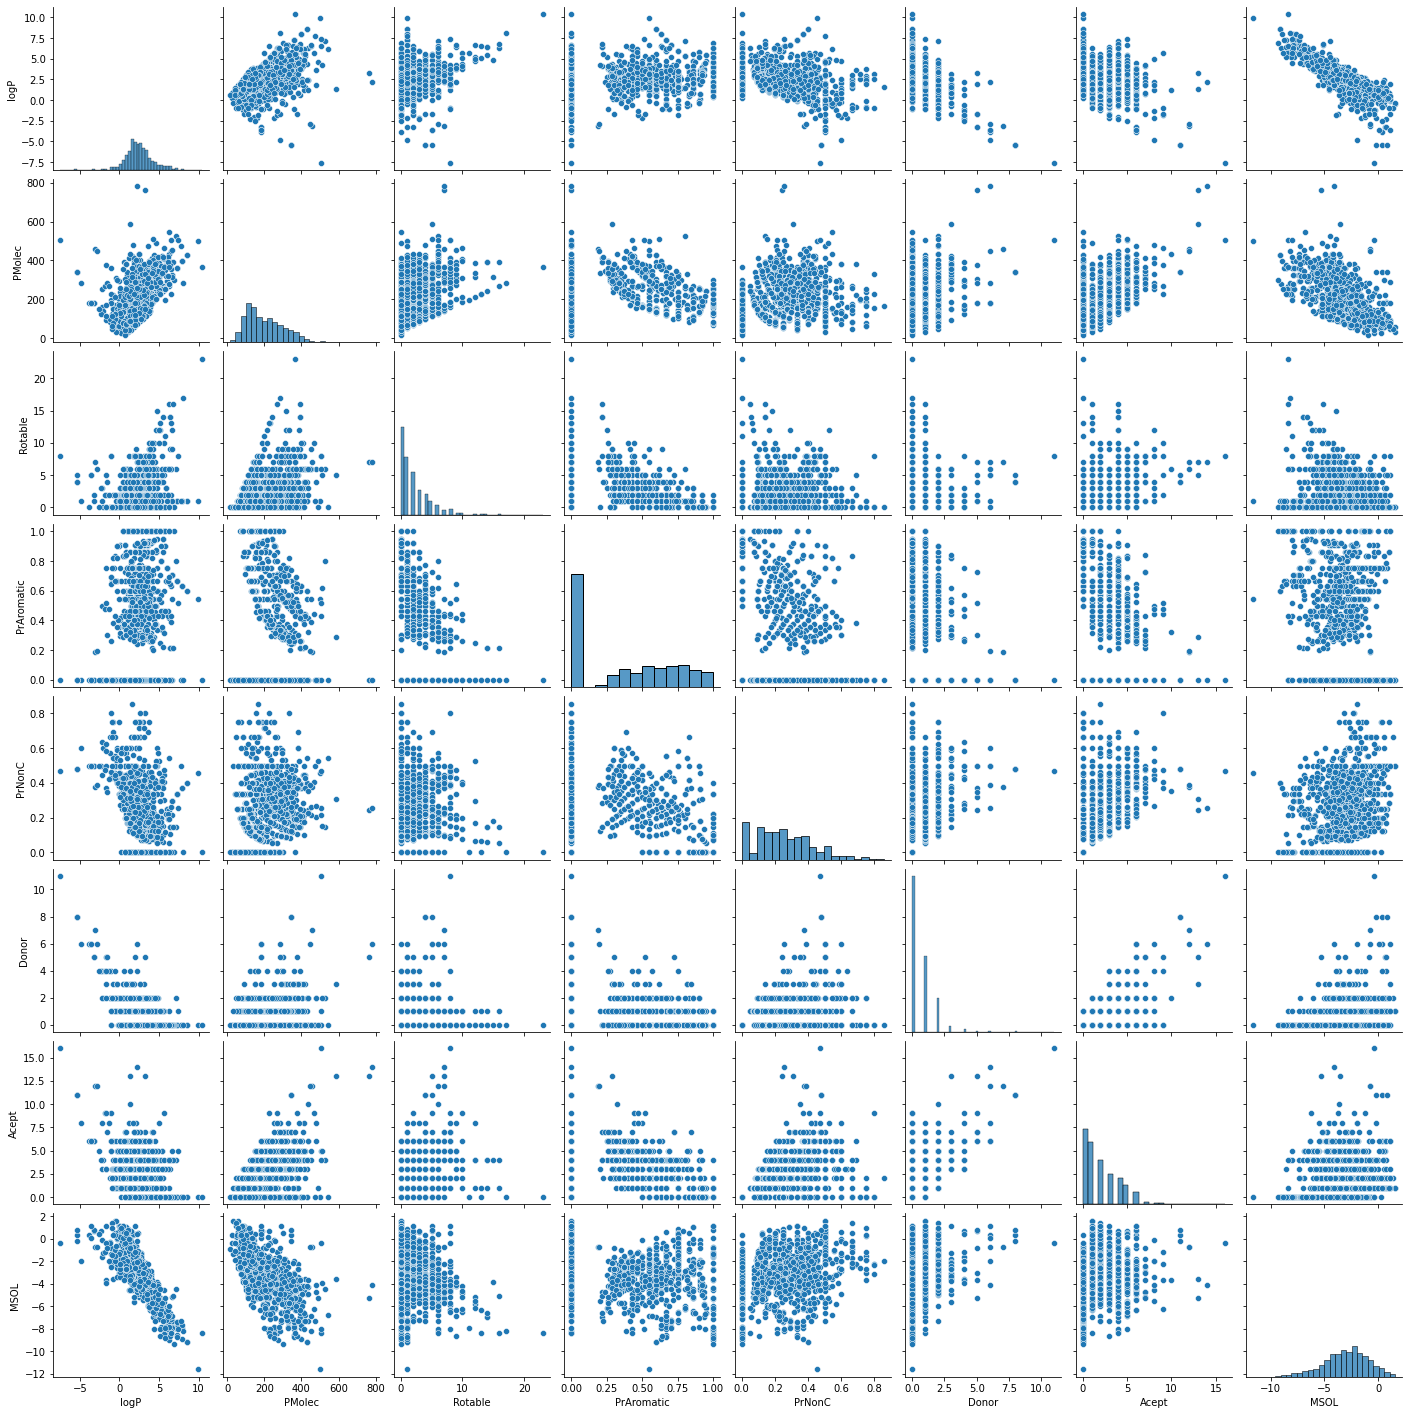

In [12]:
sns.pairplot(data=solubilidad)

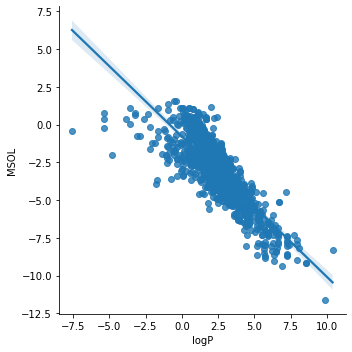

In [16]:
sns.lmplot(data=solubilidad, x='logP', y='MSOL')

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X = solubilidad.drop(['MSOL'], axis=1)
X

,logP,PMolec,Rotable,PrAromatic,PrNonC,Donor,Acept
0,2.59540,167.850,0.0,0.000000,0.666667,0.0,0.0
1,2.37650,133.405,0.0,0.000000,0.600000,0.0,0.0
2,2.59380,167.850,1.0,0.000000,0.666667,0.0,0.0
3,2.02890,133.405,1.0,0.000000,0.600000,0.0,0.0
4,2.91890,187.375,1.0,0.000000,0.750000,0.0,0.0
...,...,...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,0.500000,1.0,6.0
1140,3.42130,286.114,2.0,0.333333,0.333333,0.0,3.0
1141,3.60960,308.333,4.0,0.695652,0.173913,1.0,4.0
1142,2.56214,354.815,3.0,0.521739,0.347826,3.0,4.0


In [51]:
Y = solubilidad.iloc[:,-1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: MSOL, Length: 1144, dtype: float64

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
train = y_train.count()
test = y_test.count()
print('Numero total de muestras: ', train+test)
print('Entrenamiento: ', train)
print('Prueba: ', test)

Numero total de muestras:  1144
Entrenamiento:  858
Prueba:  286


In [76]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_predichas = model.predict(X)
y_predichas

array([-2.33830956, -1.99243059, -2.33041561, ..., -4.76979393,
       -4.4873443 , -2.68252073])

In [82]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y, y_predichas))
print('Coefficient of determination (R^2): %.2f'% r2_score(Y, y_predichas))

Coefficients: [-0.70024853 -0.00762164  0.00677356 -0.38398842  1.04899342 -0.16960211
  0.0689861 ]
Intercept: 0.059079152573712435
Mean squared error (MSE): 0.96
Coefficient of determination (R^2): 0.78


<AxesSubplot:ylabel='MSOL'>

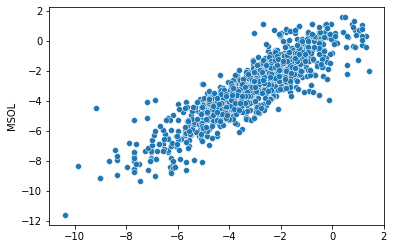

In [88]:
sns.scatterplot(x=y_predichas, y=Y)

In [89]:
import pickle

In [91]:
pickle.dump(model, open('modelo_solubilidad.pkl', 'wb'))

In [92]:
modelo_importado = open('modelo_solubilidad.pkl','rb')

In [97]:
model2 = pickle.load(modelo_importado)

In [101]:
model2.coef_

array([-0.70024853, -0.00762164,  0.00677356, -0.38398842,  1.04899342,
       -0.16960211,  0.0689861 ])